In [ ]:
from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем для to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел
import math # Для округления
import os #Для работы с файлами
# подключаем диск
from google.colab import drive

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/archive.zip' #Указываем путь к базе в Google Drive

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: afhq/train/wild/flickr_wild_001378.jpg  
  inflating: afhq/train/wild/flickr_wild_001379.jpg  
  inflating: afhq/train/wild/flickr_wild_001380.jpg  
  inflating: afhq/train/wild/flickr_wild_001381.jpg  
  inflating: afhq/train/wild/flickr_wild_001382.jpg  
  inflating: afhq/train/wild/flickr_wild_001384.jpg  
  inflating: afhq/train/wild/flickr_wild_001385.jpg  
  inflating: afhq/train/wild/flickr_wild_001386.jpg  
  inflating: afhq/train/wild/flickr_wild_001387.jpg  
  inflating: afhq/train/wild/flickr_wild_001388.jpg  
  inflating: afhq/train/wild/flickr_wild_001389.jpg  
  inflating: afhq/train/wild/flickr_wild_001390.jpg  
  inflating: afhq/train/wild/flickr_wild_001391.jpg  
  inflating: afhq/train/wild/flickr_wild_001392.jpg  
  inflating: afhq/train/wild/flickr_wild_001393.jpg  
  inflating: afhq/train/wild/flickr_wild_001394.jpg  
  inflating: afhq/train/wild/flickr_wild_001395.jpg  
  inflating: a

In [ ]:

train_path = '/content/afhq/train'
validation_path = '/content/afhq/val'

batch_size = 25 #Размер выборки
img_width = 64 #Ширина изображения
img_height = 64 #Высота изображения

datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Нормализация значений пикселей
    rotation_range=10, #Поворачиваем изображения при генерации выборки
    width_shift_range=0.1, #Двигаем изображения по ширине при генерации выборки
    height_shift_range=0.1, #Двигаем изображения по высоте при генерации выборки
    zoom_range=0.1, #Зумируем изображения при генерации выборки
    horizontal_flip=True, #Отключаем отзеркаливание изображений
    fill_mode='nearest', #Заполнение пикселей вне границ ввода
)

In [ ]:
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    validation_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [ ]:
#задаём batch_size
batch_size = 128

#Создаем последовательную модель
model = Sequential()

#Слой пакетной нормализации
model.add(BatchNormalization())
#Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Пятый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(128, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.000001), metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs=30,
    verbose=1
)

<ipython-input-15-aa774f0ea636>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
114/114 [==============================] - 16s 115ms/step - loss: 1.3787 - accuracy: 0.3740 - val_loss: 1.0469 - val_accuracy: 0.5527
Epoch 2/30
114/114 [==============================] - 13s 112ms/step - loss: 0.9425 - accuracy: 0.5414 - val_loss: 1.0086 - val_accuracy: 0.2873
Epoch 3/30
114/114 [==============================] - 13s 110ms/step - loss: 0.8154 - accuracy: 0.6495 - val_loss: 0.8485 - val_accuracy: 0.5964
Epoch 4/30
114/114 [==============================] - 13s 117ms/step - loss: 0.6685 - accuracy: 0.7180 - val_loss: 0.4803 - val_accuracy: 0.8473
Epoch 5/30
114/114 [==============================] - 13s 114ms/step - loss: 0.6293 - accuracy: 0.7407 - val_loss: 0.4668 - val_accuracy: 0.8182
Epoch 6/30
114/114 [==============================] - 13s 115ms/step - loss: 0.5218 - accuracy: 0.7968 - val_loss: 0.4996 - val_accuracy: 0.7964
Epoch 7/30
114/114 [==============================] - 12s 107ms/step - loss: 0.4530 - accuracy: 0.8166 - val_loss: 0.2966 - val_ac

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Bat  (None, None, None, 3)     12        
 chNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, None, None, 64)    1792      
                                                                 
 conv2d_9 (Conv2D)           (None, None, None, 64)    36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, None, None, 64)    0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, None, None, 64)    0         
                                                                 
 batch_normalization_5 (Bat  (None, None, None, 64)   

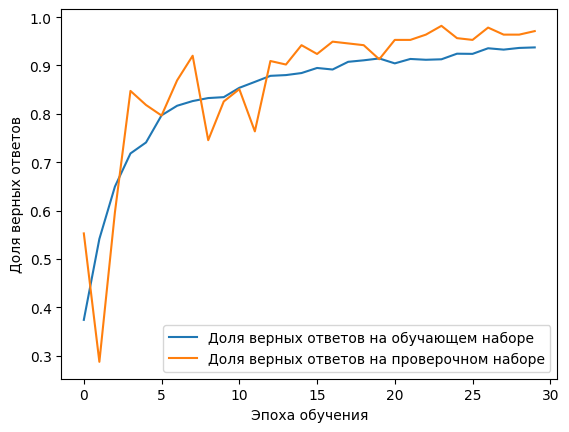

In [ ]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Глоссарий

**Сверточная нейронная сеть** - архитектура нейронных сетей, направленная на решение задачи распознавания образов

---

**Dense** - полносвязный слой.

**Conv2D** - сверточный слой

**MaxPooling2D** - слой объединения для пространственных данных

**Dropout** - случайная блокировка нейронов для предотвращения переобучения

**BatchNormalization** - слой пакетной нормализации.

**categorical_crossentropy** - метод определения ошибки нейронной сети для категориальных данных (классов). Категориальная кроссцентропия между выходным результатом и y_train.

**Flatten** - слой преобразования двумерных данных в одномерные

#Литература

Для более глубокого понимания использования библиотеки хорошо уметь искать информацию в документациях от разработчика. Официальная документация доступна на английском языке.

**Документация Keras** - https://keras.io/

**Русскоязычная документация Keras** - https://ru-keras.com/

Помимо официальной документации можно найти огромное количество полезной информации и в других источниках.

**Полезные статьи habr:**

https://habr.com/ru/post/348000/

https://habr.com/ru/post/309508/